# Classification
## Part 1:

### Use K-Nearest Neighbour on AirBnb [data](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data?resource=download)
### [Reference to example code](https://www.tutorialspoint.com/scikit_learn/scikit_learn_kneighbors_classifier.htm)
- The data file is already downloaded to: data/AB_NYC_2019.csv. Load it into pandas dataframe
- Purpose of this exercise is to use K-Neares-Neighbor algorithm to make a binary classification in order to estimate if the price of a specific Airbnb accommodation will be above or below the median, 
- First we will try to do it based on **only 2 features: longitude and latitude.** 
- Next we will see if we can improve accuracy with using more features
- As independent variables, we have location, neighborhood and the number of reviews the acommodation has on Airbnb.
#### Part 1.1: 20 min.
1. Use the following imports:
```python
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import auc, roc_curve, confusion_matrix
```
2. Get the data into a pandas dataframe
3. Add a column to the dataframe: "is_cheap", that contains boolean values for the price being below median. Hint: DataFrame has a median() method. This column contains our target data: y

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import auc, roc_curve, confusion_matrix

df = pd.read_csv('../data/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df['is_cheap']= df['price'] < df['price'].median()
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,is_cheap
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,False
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,False
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,False
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,True
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,True


#### Part 1.2: 25 min
4. Create a Classifier model with `KNeighborsClassifier()` and give it an arbitrary number for the n_neighbors argument
5. Create input data: X as a DataFrame containing only longitude and latitude.
5. Based on X and y (the target data) above, split data into training and test data using train_test_split() method with 33% test data.
6. Fit the model with the training data. Hint: `knn_class.fit(X_train, y_train)`
7. And make predictions with the test data. Hint: `knn_class.predict(X_test)`

In [4]:
KNmodel = KNeighborsClassifier(n_neighbors=20)
longitude_latitude = df[['longitude', 'latitude']]
longitude_latitude.head()

,longitude,latitude
0,-73.97237,40.64749
1,-73.98377,40.75362
2,-73.94190,40.80902
3,-73.95976,40.68514
4,-73.94399,40.79851


In [8]:
x_train, x_test, y_train, y_test = train_test_split(longitude_latitude, df['is_cheap'], test_size=0.33, random_state=42)
KNmodel.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [9]:
y_pred = KNmodel.predict(x_test)
y_pred

array([ True,  True, False, ...,  True,  True,  True])

#### Part 1.3: 25 min
8. Now we have our target and our predictions and we need to compare them to see how well our model have done. For this we ca use the roc_curve method like this: `fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=True)` where pos_label lets the algorithm know that our data uses boolean in the target column. This gives us the True Positive Rate (TPR) and the False Positive Rate (FPR). ROC Curve works by plotting the fraction of true positives out of the positives (TPR = true positive rate) vs. the fraction of false positives out of the negatives (FPR = false positive rate), at various threshold settings. Finally we use the `auc(fpr,tpr)` function to get an AUC_Score (This score is 1 when the model had 100% correct predictions and less than 1 for less perfect accuracy score. The result should be around `.7` which is not a great prediction accuracy rate, but its a start and we can try to improve it by adding more data features to the model.
Study: [ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py).
9. Now lets add some more columns from the dataframe: 
    1. First we need to One-Hot encode the data of 3 columns:['neighbourhood','neighbourhood_group','room_type']. Hint: Use pandas get_dummies method (see example in the clustering with titanic notebook.
    2. With these new columns in the dataframe do the train_test_split operation again to get 33% test data and 67% training data for both input data X and target/labels y.
    3. Normalize both training and test data with [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Hint: `StandardScaler().fit(X_train[independent_variables])` where `independent_variables` is a list of all the columns we want to use in the model (There are many so a quick way to get the names of those columns that we One-Hot encoded is by using a list comprehension like this: `[col for col in df if col.startswith('neighbourhood') or col.startswith('room_type')]`. Then just add the 'latitude', 'longitude','number_of_reviews' and 'reviews_per_month' columns.
    4. Now get the normalized training data with something like: `X_train_norm = np.nan_to_num(scaler.transform(X_train[independent_variables]))` where np.nan_to_num() is used to swap NAN for zeros.
    5. Do the same with the test data
    6. Now create a `KNeighborsClassifier` model like last time and fit it with the training data and the training targets
    7. Get predictions on the test data and produce the AUC score like last time. Is it improved?
    8. When we create our KneighborsClassifier model we can try it out with different number of neighbors and with different ways to measure the distance between the neighbors like this `KNeighborsClassifier(n_neighbors=k, metric=dist)`. [These are the different available methods for measuring distance.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html#sklearn.metrics.pairwise.distance_metrics). Now create a function that can take k and dist (as shown above) and can print an AUC score based on the data we used above and on the 2 arguments.
    9. Run the function with all combinations of n_neighbor values of 2, 4, 8, 32, 64 and with metric values of 'manhattan', 'euclidean', 'haversine','cosine'.
    10. Are there any noticable differences?

In [13]:
fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=True)
print(fpr)
print(tpr)
auc(fpr,tpr)

[0.         0.29172371 1.        ]
[0.         0.71139366 1.        ]


0.7098349731650974

In [14]:
df = pd.get_dummies(df, columns= ['neighbourhood','neighbourhood_group','room_type'])
df.head()

,id,name,host_id,host_name,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,...,neighbourhood_Woodrow,neighbourhood_Woodside,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2539,Clean & quiet apt home by the park,2787,John,40.64749,-73.97237,149,1,9,2018-10-19,...,0,0,0,1,0,0,0,0,1,0
1,2595,Skylit Midtown Castle,2845,Jennifer,40.75362,-73.98377,225,1,45,2019-05-21,...,0,0,0,0,1,0,0,1,0,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,40.80902,-73.94190,150,3,0,NaN,...,0,0,0,0,1,0,0,0,1,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,40.68514,-73.95976,89,1,270,2019-07-05,...,0,0,0,1,0,0,0,1,0,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,40.79851,-73.94399,80,10,9,2018-11-19,...,0,0,0,0,1,0,0,1,0,0


In [15]:
KNmodel = KNeighborsClassifier(n_neighbors=20)
onehot = [col for col in df if col.startswith('neighbourhood') or col.startswith('room_type')]
onehot = onehot + ['longitude', 'latitude']
df[onehot]


,neighbourhood_Allerton,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,neighbourhood_Astoria,neighbourhood_Bath Beach,neighbourhood_Battery Park City,neighbourhood_Bay Ridge,neighbourhood_Bay Terrace,"neighbourhood_Bay Terrace, Staten Island",...,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,longitude,latitude
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,-73.97237,40.64749
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,-73.98377,40.75362
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,-73.94190,40.80902
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,-73.95976,40.68514
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,-73.94399,40.79851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,-73.94995,40.67853
48891,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,-73.93317,40.70184
48892,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,-73.94867,40.81475
48893,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,-73.99112,40.75751


In [16]:
x_train, x_test, y_train, y_test = train_test_split(df[onehot], df['is_cheap'], test_size=0.33, random_state=42)
KNmodel.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [17]:
y_pred = KNmodel.predict(x_test)
y_pred

array([ True,  True, False, ...,  True,  True,  True])

In [18]:
fpr, tpr, _= roc_curve(y_test, y_pred, pos_label=True)
auc(fpr,tpr)

0.8265283342910871

In [24]:
onehot += ['number_of_reviews', 'reviews_per_month']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(df[onehot], df['is_cheap'], test_size=0.33, random_state=42)
scaler1 = StandardScaler().fit(x_train[onehot])
scaler2 = StandardScaler().fit(x_test[onehot])

In [26]:
X_train_norm = np.nan_to_num(scaler1.transform(x_train[onehot]))
X_test_norm = np.nan_to_num(scaler2.transform(x_test[onehot]))
X_train_norm

array([[-0.02872074, -0.00957007, -0.01992473, ...,  0.80418053,
         0.80418053,  0.80418053],
       [-0.02872074, -0.00957007, -0.01992473, ...,  0.25113557,
         0.25113557,  0.25113557],
       [-0.02872074, -0.00957007, -0.01992473, ..., -0.22542445,
        -0.22542445, -0.22542445],
       ...,
       [-0.02872074, -0.00957007, -0.01992473, ..., -0.61373261,
        -0.61373261, -0.61373261],
       [-0.02872074, -0.00957007, -0.01992473, ..., -0.73728521,
        -0.73728521, -0.73728521],
       [-0.02872074, -0.00957007, -0.01992473, ..., -0.79611978,
        -0.79611978, -0.79611978]])

In [27]:
KNmodel = KNeighborsClassifier(n_neighbors=20)
KNmodel.fit(X_train_norm, y_train)
y_pred = KNmodel.predict(X_test_norm)
fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=True)
auc(fpr,tpr)

0.8205701862769099

In [28]:
def knneighbourfunction(neighbours, dist):
    KNmodel = KNeighborsClassifier(n_neighbors=neighbours, metric=dist)
    KNmodel.fit(X_train_norm, y_train)
    y_pred= KNmodel.predict(X_test_norm)
    fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=True)
    return auc(fpr,tpr)

In [30]:
n_neighbour = [2,4,8,32,64]
metric_values = ['manhattan', 'euclidean','cosine']
#doesnt work with ‘haversine’
for n in n_neighbour:
    for m in metric_values:
        print(f'Parameters:{n,m} result: {knneighbourfunction(n,m)}')

Parameters:(2, 'manhattan') result: 0.758256930029381
Parameters:(2, 'euclidean') result: 0.7639392971758925
Parameters:(2, 'cosine') result: 0.7669661500531522
Parameters:(4, 'manhattan') result: 0.7919769982379429
Parameters:(4, 'euclidean') result: 0.7961097552853839
Parameters:(4, 'cosine') result: 0.7996420348667457
Parameters:(8, 'manhattan') result: 0.8127180899943441
Parameters:(8, 'euclidean') result: 0.817987169913876
Parameters:(8, 'cosine') result: 0.8191598646429218
Parameters:(32, 'manhattan') result: 0.8130301121336285
Parameters:(32, 'euclidean') result: 0.816858321131926
Parameters:(32, 'cosine') result: 0.8178220255521707
Parameters:(64, 'manhattan') result: 0.8094705863058844
Parameters:(64, 'euclidean') result: 0.8141557884600509
Parameters:(64, 'cosine') result: 0.8162790061718472


## Part 2 Neural Network
## Tutorial on [Cifar10](https://www.kaggle.com/code/roblexnana/cifar10-with-cnn-for-beginer)

In [68]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report
import itertools

%matplotlib inline

2022-11-13 10:38:31.704920: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-13 10:38:32.175354: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-13 10:38:32.175373: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-13 10:38:32.245063: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-13 10:38:33.890274: W tensorflow/stream_executor/platform/de

In [69]:
batch_size = 32  # The default batch size of keras.
num_classes = 10  # Number of class for the dataset
epochs = 100
data_augmentation = False

In [70]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170498071/170498071 [==============================] - 41s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


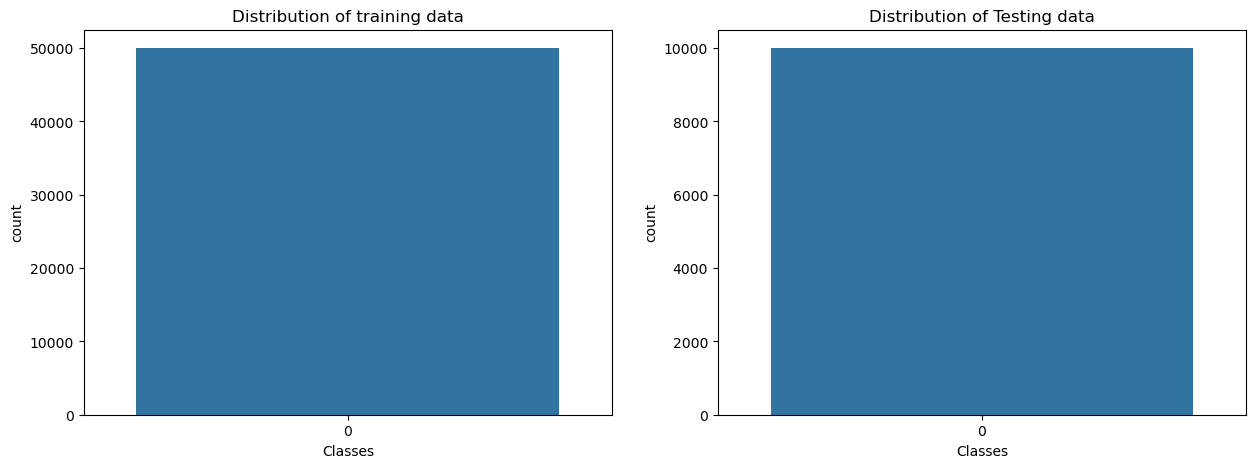

In [72]:
fig, axs = plt.subplots(1,2,figsize=(15,5)) 
# Count plot for training set
sns.countplot(y_train.ravel(), ax=axs[0])
axs[0].set_title('Distribution of training data')
axs[0].set_xlabel('Classes')
# Count plot for testing set
sns.countplot(y_test.ravel(), ax=axs[1])
axs[1].set_title('Distribution of Testing data')
axs[1].set_xlabel('Classes')
plt.show()

In [73]:
# Normalize the data. Before we need to connvert data type to float for computation.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [74]:
#define the convnet
model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTERN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________


2022-11-13 10:45:01.183764: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-13 10:45:01.184986: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-13 10:45:01.185060: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (4a0967a2d34e): /proc/driver/nvidia/version does not exist
2022-11-13 10:45:01.186249: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
          

In [75]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [76]:
history = None  # For recording the history of trainning process.
if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model.fit_generator(datagen.flow(x_train, y_train,
                                    batch_size=batch_size),
                                    epochs=epochs,
                                    validation_data=(x_test, y_test),
                                    workers=4)

Not using data augmentation.
Epoch 1/100
1563/1563 [==============================] - 109s 68ms/step - loss: 1.7893 - accuracy: 0.3442 - val_loss: 1.5238 - val_accuracy: 0.4562
Epoch 2/100
1563/1563 [==============================] - 108s 69ms/step - loss: 1.4832 - accuracy: 0.4598 - val_loss: 1.3544 - val_accuracy: 0.5155
Epoch 3/100
1563/1563 [==============================] - 107s 68ms/step - loss: 1.3502 - accuracy: 0.5167 - val_loss: 1.2536 - val_accuracy: 0.5582
Epoch 4/100
1563/1563 [==============================] - 105s 67ms/step - loss: 1.2540 - accuracy: 0.5538 - val_loss: 1.1761 - val_accuracy: 0.5857
Epoch 5/100
1563/1563 [==============================] - 103s 66ms/step - loss: 1.1729 - accuracy: 0.5858 - val_loss: 1.1028 - val_accuracy: 0.6085
Epoch 6/100
1563/1563 [==============================] - 105s 67ms/step - loss: 1.1084 - accuracy: 0.6093 - val_loss: 1.1066 - val_accuracy: 0.6159
Epoch 7/100
1563/1563 [==============================] - 111s 71ms/step - loss: 1.0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


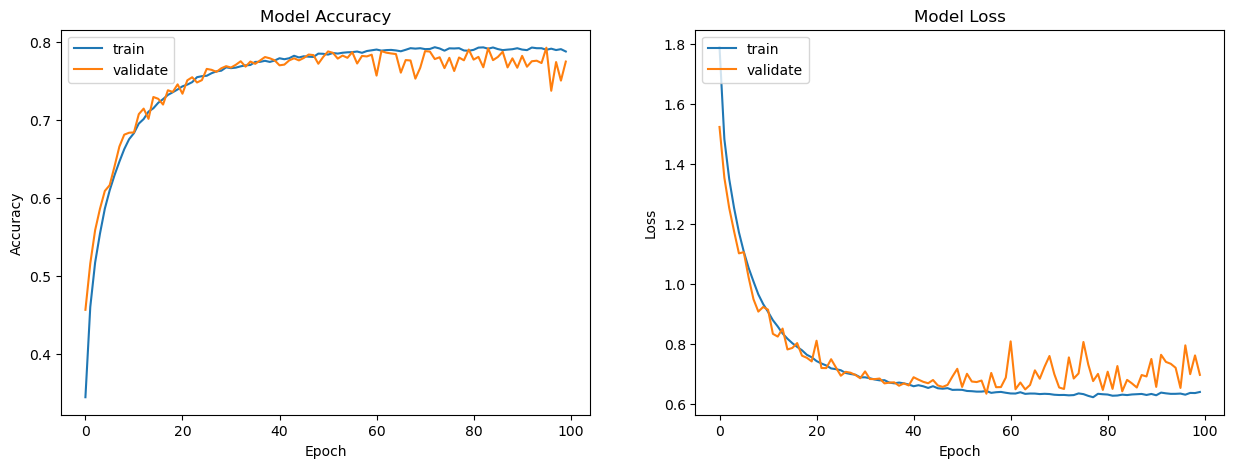

In [77]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)

In [78]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model.predict(x_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.6979 - accuracy: 0.7743
Test loss: 0.6979487538337708
Test accuracy: 0.7742999792098999
313/313 [==============================] - 6s 17ms/step


In [79]:
def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    """
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    
    ax.set_xlabel('Predicted Label') 
    ax.set_ylabel('True Label')
    
    return im, cbar

def annotate_heatmap(im, data=None, fmt="d", threshold=None):
    """
    A function to annotate a heatmap.
    """
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment="center",
                                 color="white" if data[i, j] > thresh else "black")
            texts.append(text)

    return texts

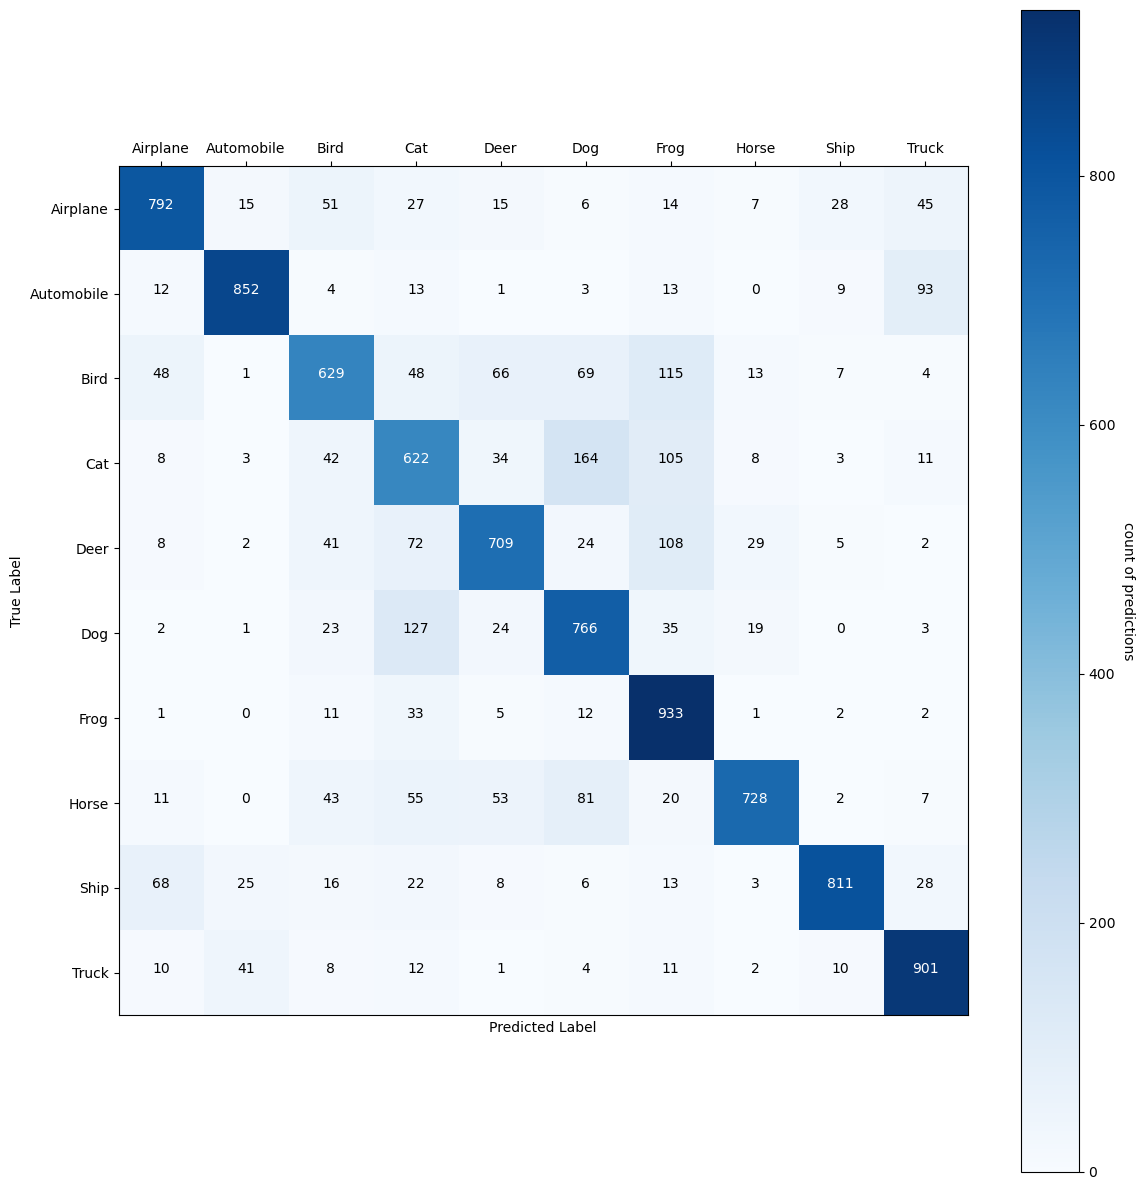

In [80]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred, axis=1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = x_test[errors]

cm = confusion_matrix(Y_true, Y_pred_classes) 
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(12,12))
im, cbar = heatmap(cm, labels, labels, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.show()

In [81]:
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1000
           1       0.91      0.85      0.88      1000
           2       0.72      0.63      0.67      1000
           3       0.60      0.62      0.61      1000
           4       0.77      0.71      0.74      1000
           5       0.67      0.77      0.72      1000
           6       0.68      0.93      0.79      1000
           7       0.90      0.73      0.80      1000
           8       0.92      0.81      0.86      1000
           9       0.82      0.90      0.86      1000

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000



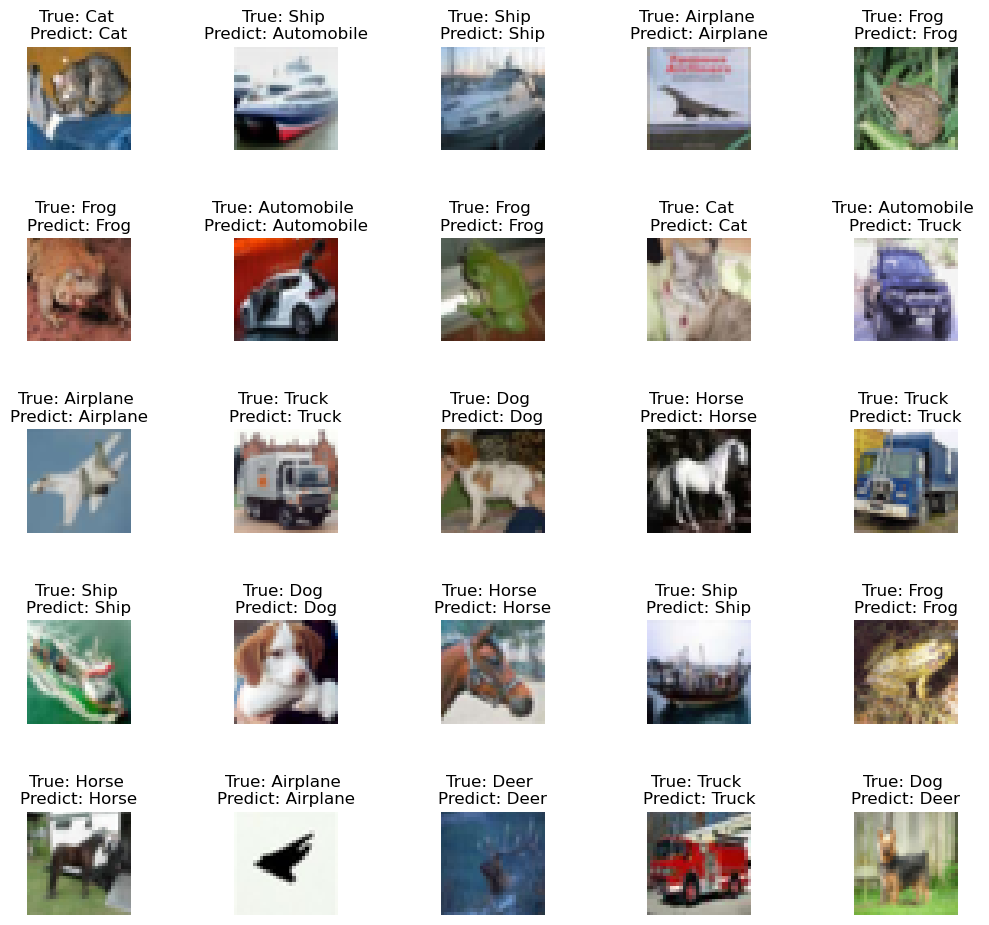

In [82]:
R = 5
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (labels[Y_true[i]], labels[Y_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

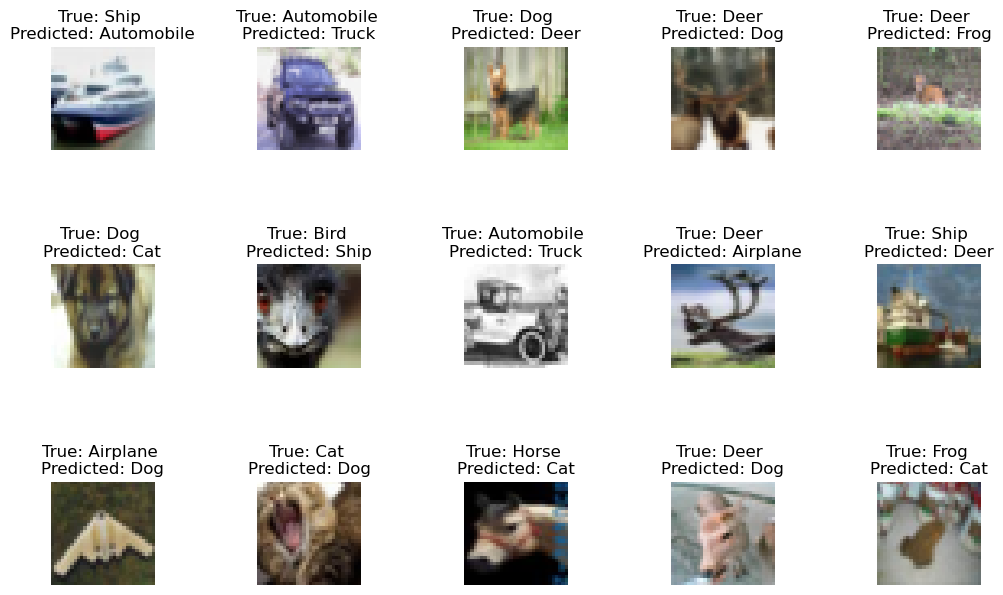

In [83]:
R = 3
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,8))
axes = axes.ravel()

misclassified_idx = np.where(Y_pred_classes != Y_true)[0]
for i in np.arange(0, R*C):
    axes[i].imshow(x_test[misclassified_idx[i]])
    axes[i].set_title("True: %s \nPredicted: %s" % (labels[Y_true[misclassified_idx[i]]], 
                                                  labels[Y_pred_classes[misclassified_idx[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

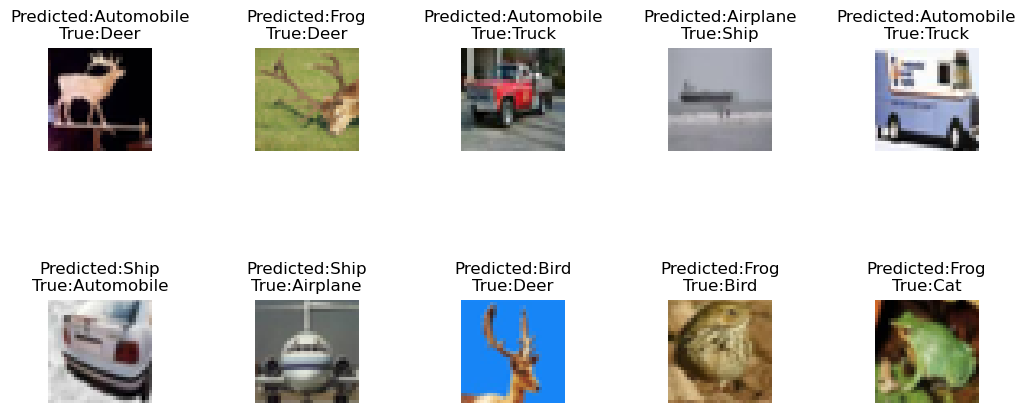

In [84]:
def display_errors(errors_index, img_errors, pred_errors, obs_errors):
    """ This function shows 10 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 5
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True, figsize=(12,6))
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((32,32,3)))
            ax[row,col].set_title("Predicted:{}\nTrue:{}".
                                  format(labels[pred_errors[error]],labels[obs_errors[error]]))
            n += 1
            ax[row,col].axis('off')
            plt.subplots_adjust(wspace=1)

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 10 errors 
most_important_errors = sorted_dela_errors[-10:]

# Show the top 10 errors
display_errors(most_important_errors, X_test_errors, Y_pred_classes_errors, Y_true_errors)

In [87]:
def show_test(number):
    fig = plt.figure(figsize = (3,3))
    test_image = np.expand_dims(x_test[number], axis=0)
    test_result = model.predict_classes(test_image)
    plt.imshow(x_test[number])
    dict_key = test_result[0]
    plt.title("Predicted: {} \nTrue Label: {}".format(labels[dict_key],
                                                      labels[Y_true[number]]))

In [89]:
show_test(20)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

<Figure size 300x300 with 0 Axes>

In [90]:
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Saved trained model at /home/jovyan/my_notebooks/saved_models/keras_cifar10_trained_model.h5 
313/313 [==============================] - 5s 17ms/step - loss: 0.6979 - accuracy: 0.7743
Test loss: 0.6979487538337708
Test accuracy: 0.7742999792098999
